# imports

In [1]:
from notebooks_tools import *
%matplotlib inline

# load MC tracks

In [2]:
MC_gen_protons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/g4_features_p_0.02-1.5GeV_isotropic_AnalysisTrees_anatreefiles_0_to_397.csv')
MC_gen_protons = MC_gen_protons[(MC_gen_protons.pdg==2212) & (MC_gen_protons.primary==1)]
MC_rec_protons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_p_0.02-1.5GeV_isotropic_AnalysisTrees.csv')
MC_rec_protons = MC_rec_protons[(MC_rec_protons.MCpdgCode==2212)  & (MC_rec_protons.process_primary==1)]

In [70]:
len(MC_gen_protons)

9517

In [100]:
def acceptace_1d( var='P', x_label='momentum [GeV/c]',
                 bins=np.linspace(0,2,30) ,
                 figsize=(10,10),fontsize=20,
                legend_loc='lower left'):
    x = [bins[i] for i in range(len(bins)-1)]

    fig = plt.figure(figsize=figsize)
    ax=fig.add_subplot(211)
    h_gen,edges=np.histogram(MC_gen_protons[var],bins=bins)
    h_gen_err = np.sqrt(h_gen)
    h_rec,edges=np.histogram(MC_rec_protons['truth_'+var],bins=bins)
    h_rec_err = np.sqrt(h_rec)
    plt.errorbar(x, h_gen, yerr=h_gen_err, fmt='o',markersize=4,label='generated')
    plt.errorbar(x, h_rec, yerr=h_rec_err, fmt='s',markersize=4,label='reconstructed')

    plt.legend(fontsize=fontsize,loc=legend_loc)
    set_axes(ax,'','')
    acceptance = [float(h_rec[i])/h_gen[i] if h_gen[i]>0 else 0 for i in range(len(h_gen))]
    acceptance_err = [sqrt(1./h_rec[i]+1./h_gen[i]) if h_gen[i]>50 and h_rec[i]>50 else 0 for i in range(len(h_gen))]

    ax=fig.add_subplot(212)
    plt.errorbar(x, acceptance, yerr=acceptance_err, fmt='o',label='Reconstructed proton tracks')
    plt.plot(x,acceptance,color='r',marker='s')
    ax.set_ylim(0,np.max([1.,1.2*np.max(acceptance+acceptance_err)]))
    set_axes(ax,x_label,'fraction of true protons')

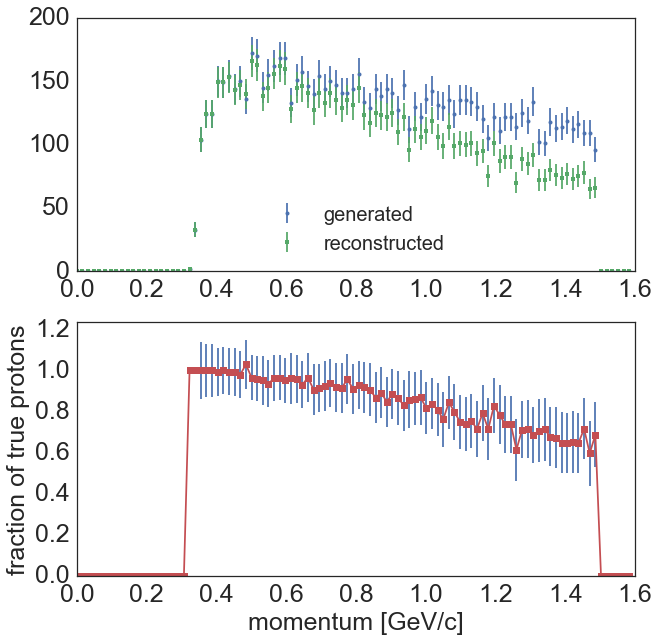

In [106]:
acceptace_1d( var='P', x_label='momentum [GeV/c]', bins=np.linspace(0.,1.6,100) , legend_loc='lower center')

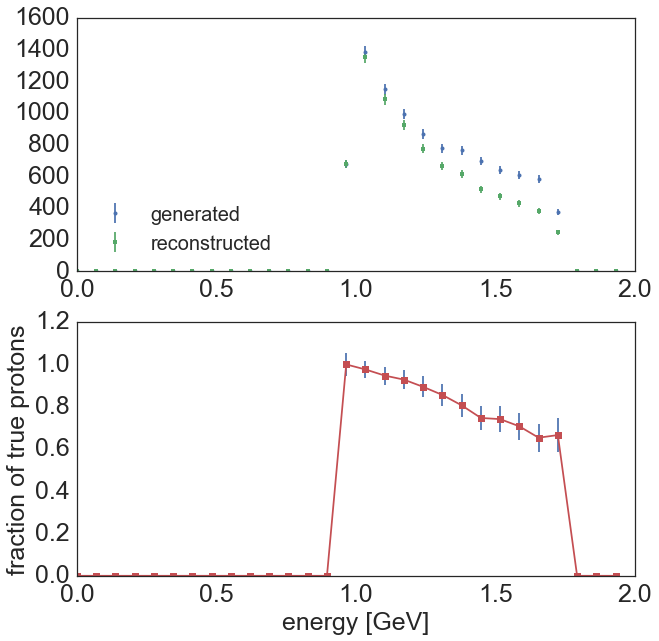

In [107]:
acceptace_1d( var='Eng', x_label='energy [GeV]', bins=np.linspace(0,2,30) )

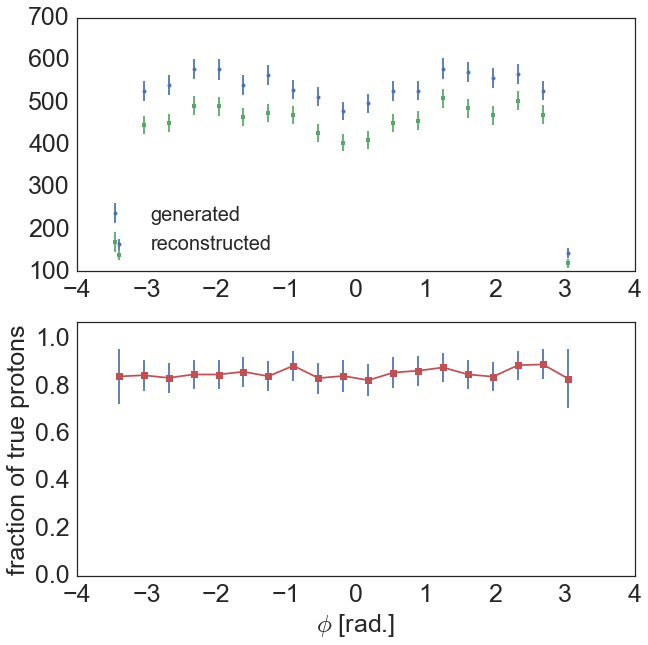

In [108]:
acceptace_1d( var='phi', x_label='$\\phi$ [rad.]', bins=np.linspace(-3.4,3.4,20) )

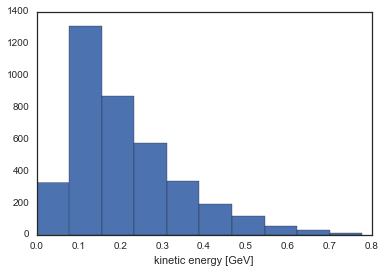

In [17]:
plt.hist(MC_gen_protons.Eng-0.938)
plt.xlabel('kinetic energy [GeV]')

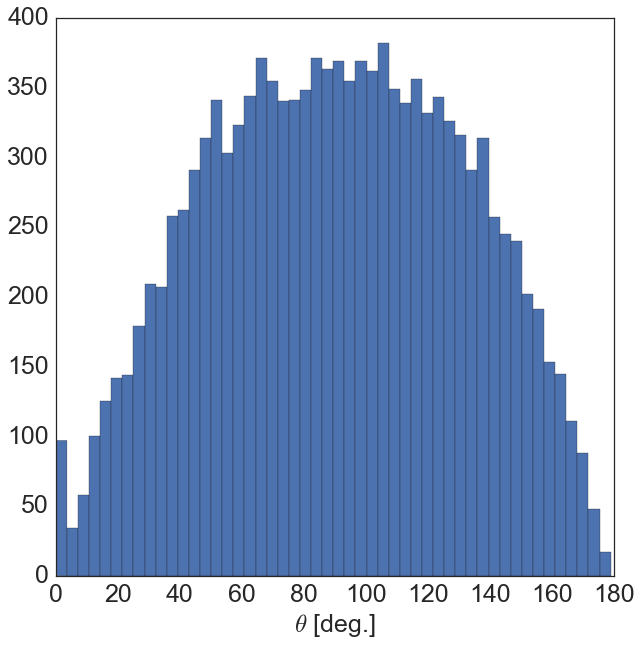

In [3]:
pt.plot_1d_hist(180/3.1415*MC_protons.truth_theta,bins=50,histtype='bar',xlabel='$\\theta$ [deg.]')

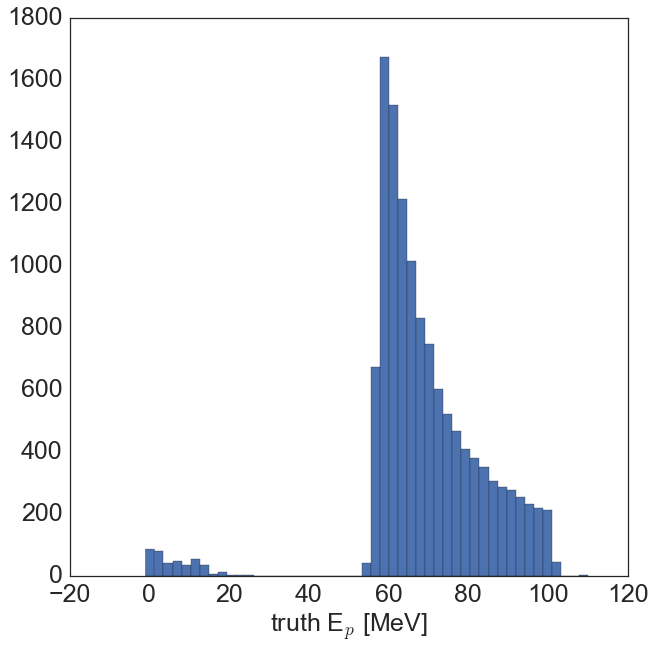

In [6]:
pt.plot_1d_hist(180/3.1415*MC_protons.truth_Eng,bins=np.linspace(-1,110,50),histtype='bar',xlabel='truth E$_{p}$ [MeV]')

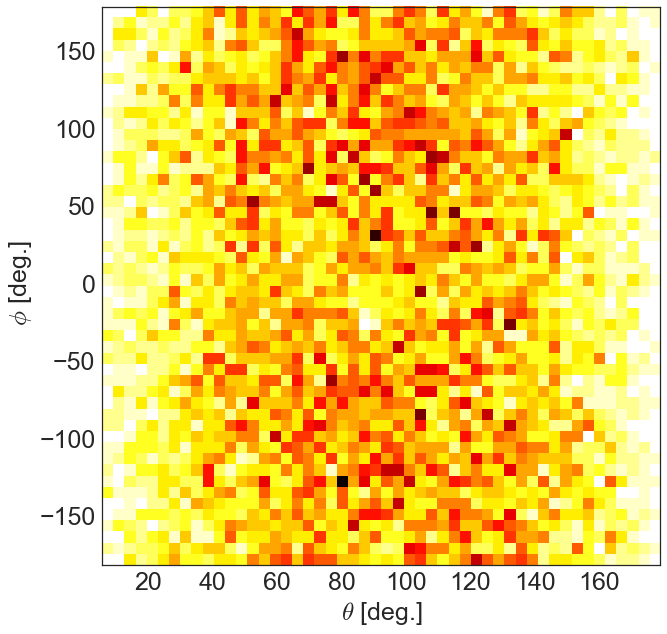

In [8]:
    pt.plot_2d_hist(180/3.1415*MC_protons.truth_theta[MC_protons.truth_theta>0.1],
                    180/3.1415*MC_protons.truth_phi[MC_protons.truth_theta>0.1],
                bins=(50,50),
                xlabel='$\\theta$ [deg.]',ylabel=' $\\phi$ [deg.]')

In [10]:
MC_protons.p = np.sqrt(MC_protons.truth_Eng*MC_protons.truth_Eng - 0.879)

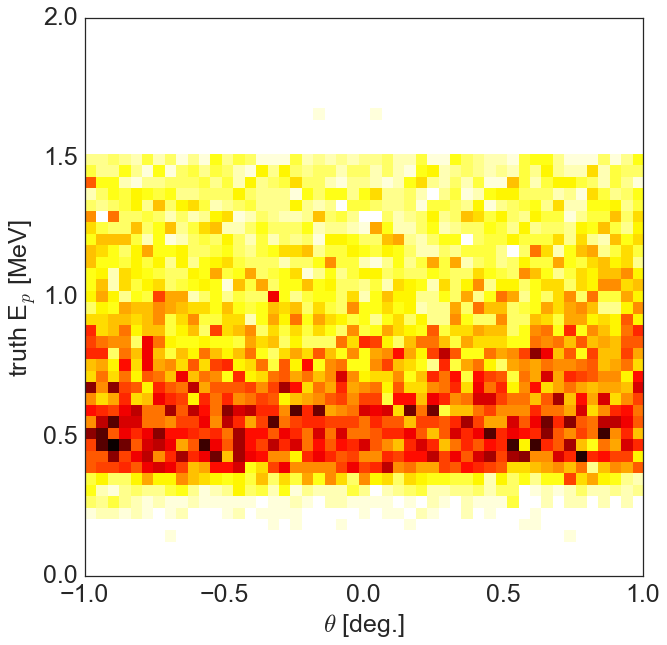

In [14]:
pt.plot_2d_hist(np.cos(MC_protons.truth_theta[MC_protons.truth_Eng>0]), #180/3.1415*
                MC_protons.p[MC_protons.truth_Eng>0],
                bins=(np.linspace(-1,1,50),np.linspace(0,2,50)),
                xlabel='$\\theta$ [deg.]',ylabel='truth E$_{p}$ [MeV]')